<a href="https://colab.research.google.com/github/Shahi77/Severity-classification-of-software-code-smells/blob/main/dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import trim_mean, iqr
from scipy import stats

4 datasets from source: mlcsd-severity-dataset (Francesca Arcelli Fontana)

In [3]:
df1 = pd.read_csv('dataset-data-class.csv')
df2 = pd.read_csv('dataset-feature-envy.csv')
df3 = pd.read_csv('dataset-god-class.csv')
df4 = pd.read_csv('dataset-long-method.csv')

Check for missing values and data quality for each dataset(df1). **Output** shows that dataset contains 420 rows and 68 columns, All columns have 0 missing values.The severity column is of type float64, indicating numerical values.Some columns, like dataset, project, and package, are of type object, meaning they contain categorical data.

In [4]:
print(df1.shape)
print(df1.isnull().sum())
print(df1.describe())
print(df1.info())

(420, 68)
dataset                                0
project                                0
package                                0
complextype                            0
severity                               0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 68, dtype: int64
         severity  AMWNAMM_type    AMW_type   ATFD_type    CBO_type  \
count  420.000000    420.000000  420.000000  420.000000  420.000000   
mean     2.500000      3.460940    3.219355   15.314286   14.040476   
std      1.250298      5.594556    4.729016   34.857450   42.547469   
min      1.000000      0.000000    1.000000    0.000000    0.000000   
25%      1.000000      1.000000    1.000000    0.000000    1.000000   
50%      3.000000      1.500000    1.414286    0.000000    3.000000   
75%      4.000000

This describes for dataset(df2) that the dataset contains 420 entries and 90 features & there are no missing values in any of the columns (isnull().sum() is 0 for all features).The dataset contains a mix of float64 (83 columns) and object (7 columns) data types.

In [5]:
print(df2.shape)
print(df2.isnull().sum())
print(df2.describe())
print(df2.info())

(420, 90)
dataset                                0
project                                0
package                                0
complextype                            0
method                                 0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 90, dtype: int64
         severity  NOP_method   CC_method  ATFD_method  FDP_method  \
count  420.000000  420.000000  420.000000   420.000000  420.000000   
mean     1.664286    2.295238    0.588095     5.864286    1.697619   
std      0.996011    3.094144    1.522889    10.283948    2.499927   
min      1.000000    0.000000    0.000000     0.000000    0.000000   
25%      1.000000    1.000000    0.000000     0.000000    0.000000   
50%      1.000000    1.000000    0.000000     0.500000    0.500000   
75%      3.000000    3.0

The dataset contains 420 rows and 68 columns, with no missing values in any column and a combination of both numerical and categorical variables.
The severity column is of type float64, indicating it holds numerical values, with a range of 1 to 4 and a mean of 2.5. Several columns like dataset, project, package, and complextype are of type object, indicating they contain categorical data. Other columns such as AMW_type, CBO_type, LCOM5_type, etc., are also of type float64, representing various software metrics.

In [6]:
print(df3.shape)
print(df3.isnull().sum())
print(df3.info())

(420, 68)
dataset                                0
project                                0
package                                0
complextype                            0
severity                               0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 68, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   dataset                                           420 non-null    object 
 1   project                                           420 non-null    object 
 2   package                                           420 non-null    object 
 3   complexty


The dataset contains 420 rows and 90 columns, with no missing values.
There are 83 numerical columns (of type float64) and 7 categorical columns (of type object).
Some notable categorical columns include:
dataset, project, package, complextype, method, modifier_type, and visibility_type.
The numerical columns represent various metrics related to methods, types, and attributes in the data.

In [8]:
print(df4.shape)
print(df4.isnull().sum())
print(df4.info())

(420, 90)
dataset                                0
project                                0
package                                0
complextype                            0
method                                 0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 90, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 90 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   dataset                                           420 non-null    object 
 1   project                                           420 non-null    object 
 2   package                                           420 non-null    object 
 3   complexty

 Display first few rows of four different dataframes (df1, df2, df3, and df4) representing different types of code smells: Data Class, Feature Envy, God Class, and Long Method.Each category contains detailed metrics and characteristics of different software components (like classes, methods, or packages) that exhibit these smells.
The data describes four software code smells:
1.   Data Class: Classes that store data but have little functionality.
2.   Feature Envy: Methods overly dependent on another class.
3.   God Class: Classes that take on too much responsibility.
4.   Long Method: Methods that are excessively long and complex.
Each dataset includes metrics and severity levels to assess these smells.

In [9]:
print("Data Class:\n", df1.head())
print("Feature Envy:\n", df2.head())
print("God Class:\n", df3.head())
print("Long Method:\n", df4.head())


Data Class:
       dataset      project package           complextype  severity  \
0  data-class  fitjava-1.1     fat  DocumentParseFixture       1.0   
1  data-class  fitjava-1.1     fat            Frameworks       1.0   
2  data-class  fitjava-1.1     fat     TableParseFixture       1.0   
3  data-class  fitjava-1.1     fat                Divide       1.0   
4  data-class  fitjava-1.1     fat    FixtureNameFixture       1.0   

   AMWNAMM_type  AMW_type  ATFD_type  CBO_type  CFNAMM_type  ...  \
0           1.5       1.5        3.0       5.0          2.0  ...   
1           2.0       2.0        0.0       5.0          0.0  ...   
2           1.0       1.0        2.0       5.0          2.0  ...   
3           1.0       1.0        0.0       5.0          0.0  ...   
4           2.0       2.0        0.0       5.0          3.0  ...   

   number_package_visibility_attributes  number_package_visibility_methods  \
0                                   0.0                                0.0   
1

Dataset information and null value counts for your four datasets:
Dataset Summaries
Dataset 1:
*  Entries: 420
*  Columns: 68
*  Data Types: 62 float64, 6 object
*  Null Values: None in all columns.

Dataset 2:
*  Entries: 420
*  Columns: 90
*  Data Types: 83 float64, 7 object
*  Null Values: None in all columns.

Dataset 3:
*  Entries: 420
*  Columns: 68
*  Data Types: 62 float64, 6 object
*  Null Values: None in all columns.

Dataset 4:

*  Entries: 420
*  Columns: 90
*  Data Types: 83 float64, 7 object
*  Null Values: None in all columns.


In [10]:
# Check for null values and data types
for i, df in enumerate([df1, df2, df3, df4], 1):
    print(f"\nDataset {i} Information:\n")
    print(df.info())
    print(f"\nNull Values in Dataset {i}:\n")
    print(df.isnull().sum())



Dataset 1 Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   dataset                                           420 non-null    object 
 1   project                                           420 non-null    object 
 2   package                                           420 non-null    object 
 3   complextype                                       420 non-null    object 
 4   severity                                          420 non-null    float64
 5   AMWNAMM_type                                      420 non-null    float64
 6   AMW_type                                          420 non-null    float64
 7   ATFD_type                                         420 non-null    float64
 8   CBO_type                                          420 non-null    float64
 

 Descriptive statistics on four datasets.
It looks like you've run descriptive statistics on four datasets.
Dataset 1:
* Count: 420
* Severity: Mean = 2.50, Std = 1.25, Min = 1, Max = 4
* CBO_type: Mean = 14.04, Std = 42.55, Min = 0, Max = 784
* LOCNAMM_type: Mean = 565.41, Std = 964.97, Min = 0, Max = 690*

Dataset 2:
* Count: 420
* Severity: Mean = 1.66, Std = 0.996, Min = 1, Max = 4
* NOP_method: Mean = 2.30, Std = 3.09, Min = 0, Max = 29
* CYCLO_method: Mean = 15.48, Std = 25.20, Min = 1, Max = 248

Dataset 3:
* Count: 420
* Severity: Mean = 2.50, Std = 1.26, Min = 1, Max = 4
* CBO_type: Mean = 14.36, Std = 42.55, Min = 0, Max = 784
* LOCNAMM_type: Mean = 604.47, Std = 981.99, Min = 0, Max = 6908

Dataset 4:
* Count: 420
* Severity: Similar mean to previous datasets
* NOP_method: Ranges similar to Dataset 2

This shows that the severity values are relatively consistent across the datasets, indicating a similar distribution of code severity.
Metrics like CBO_type and LOCNAMM_type show a wide range, suggesting variability in complexity and size across the samples.
The standard deviations in methods and attributes indicate a significant spread in the dataset features.


In [12]:
# Basic statistics for each dataset
for i, df in enumerate([df1, df2, df3, df4], 1):
    print(f"\nDescriptive Statistics for Dataset {i}:\n")
    print(df.describe())


Descriptive Statistics for Dataset 1:

         severity  AMWNAMM_type    AMW_type   ATFD_type    CBO_type  \
count  420.000000    420.000000  420.000000  420.000000  420.000000   
mean     2.500000      3.460940    3.219355   15.314286   14.040476   
std      1.250298      5.594556    4.729016   34.857450   42.547469   
min      1.000000      0.000000    1.000000    0.000000    0.000000   
25%      1.000000      1.000000    1.000000    0.000000    1.000000   
50%      3.000000      1.500000    1.414286    0.000000    3.000000   
75%      4.000000      4.242260    3.688425   13.000000   16.250000   
max      4.000000     67.500000   50.800000  332.000000  784.000000   

       CFNAMM_type    DIT_type  FANOUT_type  LCOM5_type  LOCNAMM_type  ...  \
count   420.000000  420.000000   420.000000  420.000000    420.000000  ...   
mean     19.835714    1.850000     8.376190    0.737151    565.414286  ...   
std      36.353858    1.410454    14.083671    0.364867    964.965935  ...   
min     

Assessing class distribution and identifying potential class imbalances within the **severity** column across multiple datasets.
obervation: Class 1 is consistently the most frequent class across all datasets, indicating a potential imbalance.
Class 2 appears to be the least frequent in all datasets, particularly in Dataset 2 and Dataset 4, which may lead to issues when training models (e.g., bias towards Class 1).
Classes 3 and 4 vary in frequency but are generally less frequent than Class 1.

severity
1.0    151
4.0    124
3.0    113
2.0     32
Name: count, dtype: int64
severity
1.0    280
3.0     95
2.0     23
4.0     22
Name: count, dtype: int64
severity
1.0    154
4.0    127
3.0    110
2.0     29
Name: count, dtype: int64
severity
1.0    280
3.0     95
4.0     34
2.0     11
Name: count, dtype: int64


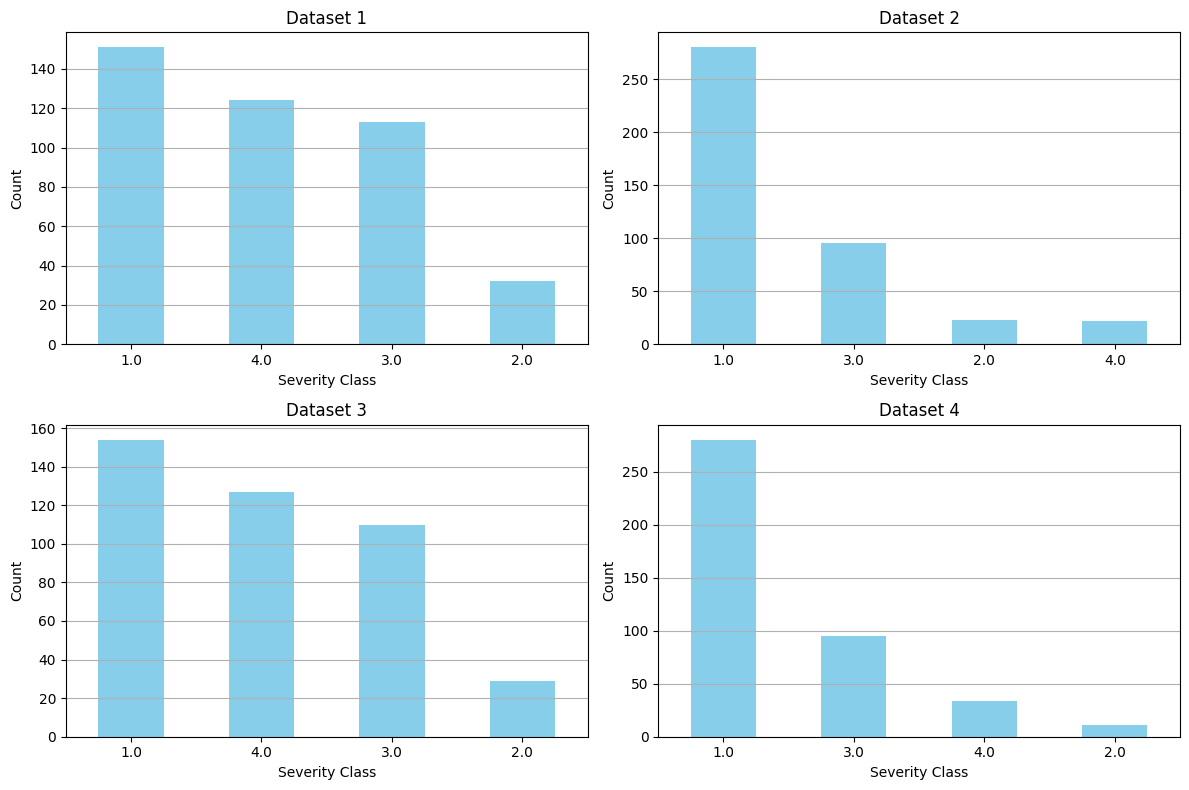

In [16]:
datasets = [df1, df2, df3, df4]
dataset_names = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

# Set up the plot
plt.figure(figsize=(12, 8))

for i, (name, df) in enumerate(zip(dataset_names, datasets)):
    severity_counts = df['severity'].value_counts()
    print(severity_counts)

    # Plot the counts
    plt.subplot(2, 2, i + 1)
    severity_counts.plot(kind='bar', color='skyblue')
    plt.title(name)
    plt.xlabel('Severity Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()


Visualizing numeric features using boxplots and removing outliers from datasets.

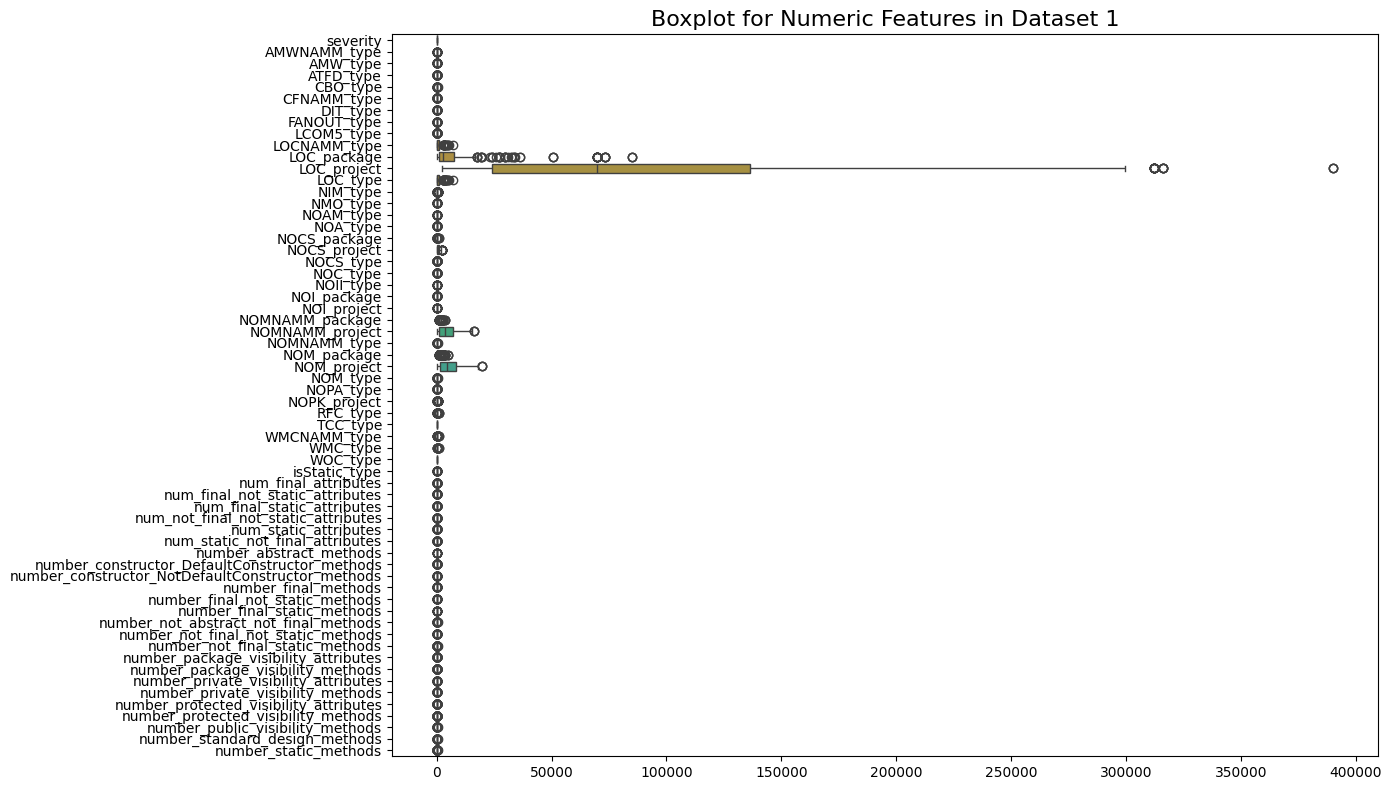


Dataset 1 cleaned. Rows before: 420, after: 246


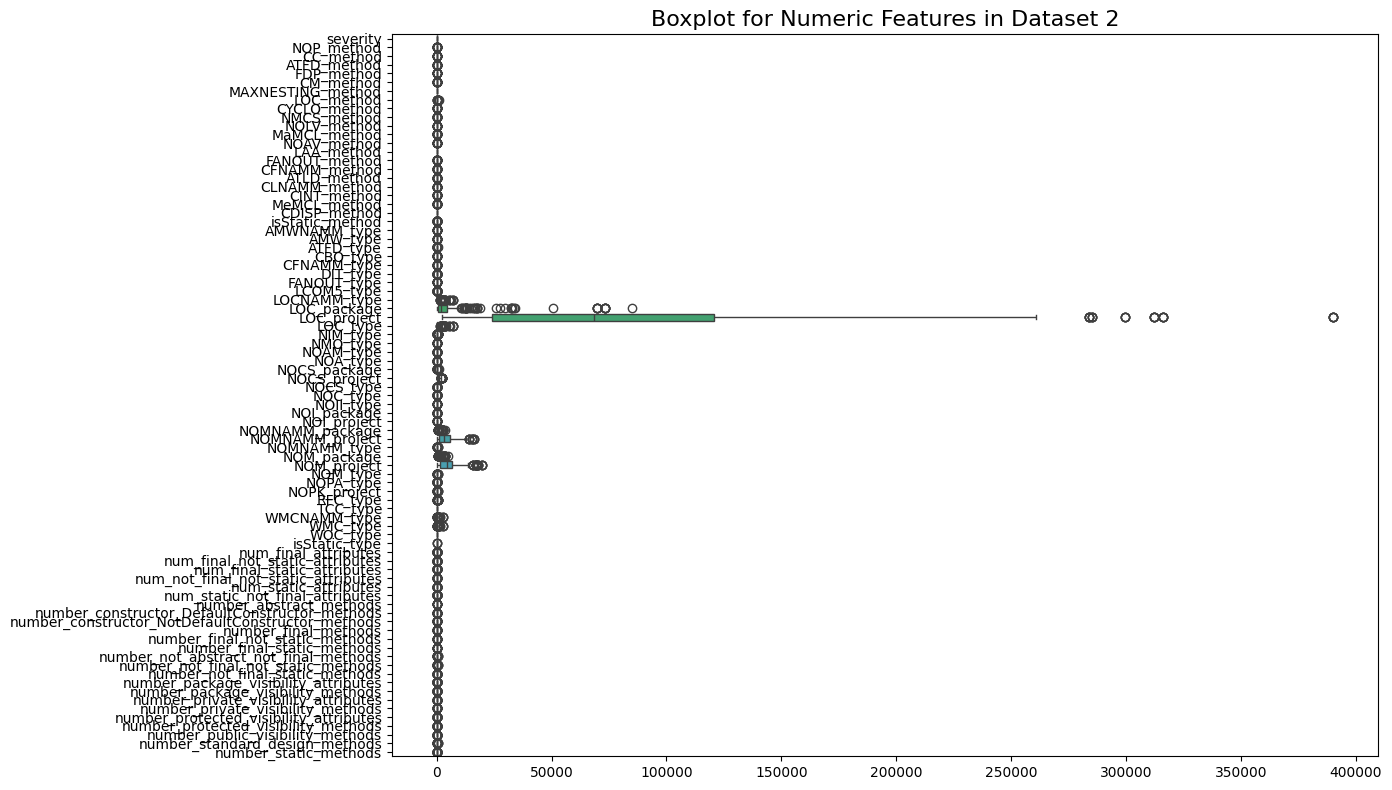


Dataset 2 cleaned. Rows before: 420, after: 229


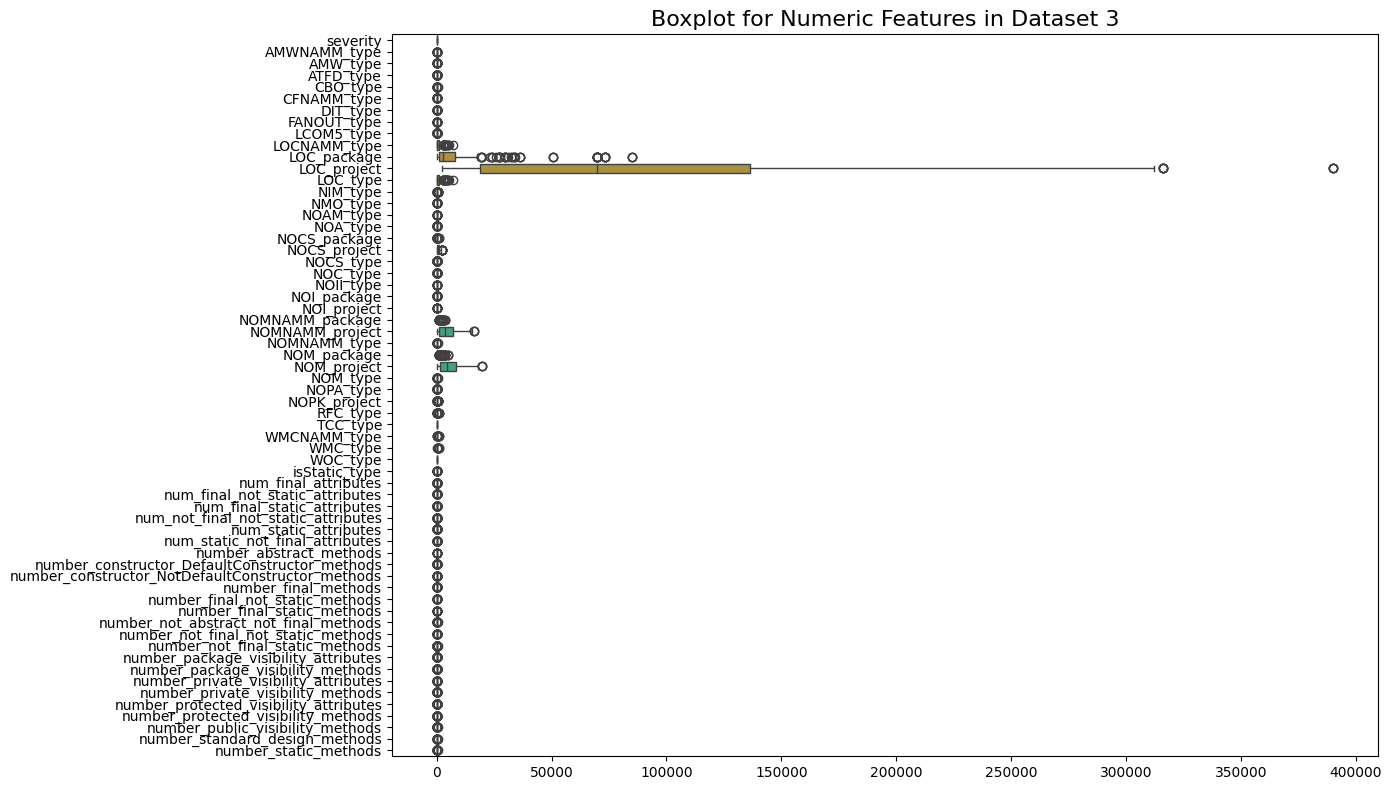


Dataset 3 cleaned. Rows before: 420, after: 239


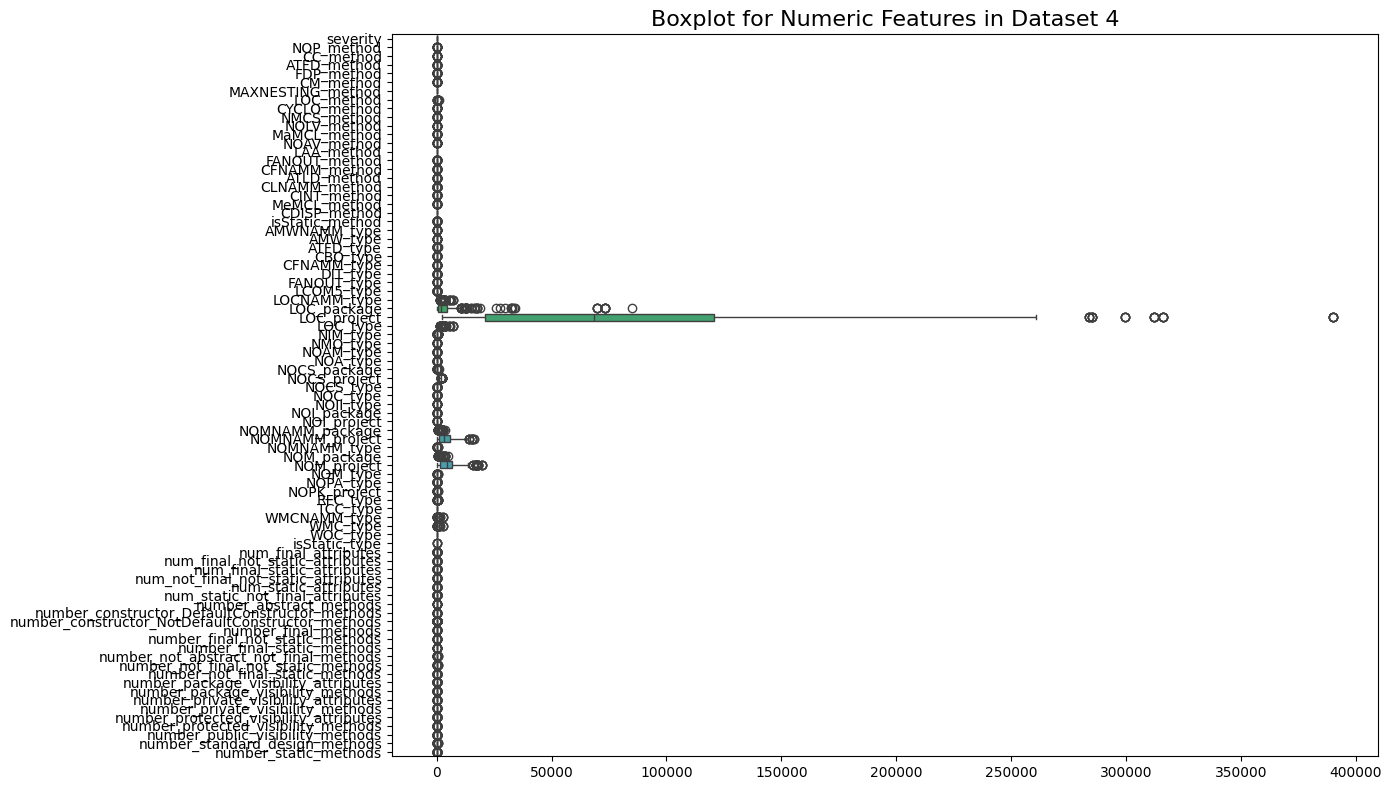


Dataset 4 cleaned. Rows before: 420, after: 220


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_boxplot(df, dataset_index):
    numeric_cols = df.select_dtypes(include=np.number)

    if not numeric_cols.empty:
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=numeric_cols, orient="h")
        plt.title(f'Boxplot for Numeric Features in Dataset {dataset_index}', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Dataset {dataset_index} has no numeric columns for boxplot visualization.")

def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=np.number)
    if not numeric_cols.empty:
        z_scores = np.abs(stats.zscore(numeric_cols))
        df_clean = df[(z_scores < 3).all(axis=1)]  # Keep rows where all Z-scores are < 3
        return df_clean
    else:
        print("No numeric columns to remove outliers from.")
        return df

datasets = [df1, df2, df3, df4]
dataset_names = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

for i, df in enumerate(datasets, 1):
    plot_boxplot(df, i)

    # Remove outliers and report the number of rows before and after
    df_clean = remove_outliers(df)
    print(f"\nDataset {i} cleaned. Rows before: {df.shape[0]}, after: {df_clean.shape[0]}")


Filling missing values with mean

In [18]:
for i, df in enumerate(datasets, 1):
    numeric_cols = df.select_dtypes(include=np.number).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    print(f"\nDataset {i} - After Handling Missing Values")
    print(df.isnull().sum())

datasets = [df for df in datasets]




Dataset 1 - After Handling Missing Values
dataset                                0
project                                0
package                                0
complextype                            0
severity                               0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type                        0
Length: 68, dtype: int64

Dataset 2 - After Handling Missing Values
dataset                                0
project                                0
package                                0
complextype                            0
method                                 0
                                      ..
number_protected_visibility_methods    0
number_public_visibility_methods       0
number_standard_design_methods         0
number_static_methods                  0
visibility_type             

Since datasets exhibit class imbalances in the severity classification.
(Initially, the distribution of the severity classes was analyzed to identify underrepresented classes. Subsequently, the SMOTE method was utilized for oversampling, generating synthetic samples for minority classes to achieve a balanced distribution. For each dataset, features were separated from the target variable, and SMOTE was applied to the training set to equalize the number of instances across all classes.)

In [26]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

datasets = [df1, df2, df3, df4]

for i, df in enumerate(datasets, 1):
    if 'severity' in df.columns:
        # Separate features and target
        X = df.drop('severity', axis=1)  # Features
        y = df['severity']                # Target variable

        # Convert categorical columns to numeric
        for col in X.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
        df_resampled['severity'] = y_resampled

        print(f"\nDataset {i} Resampled Class Distribution:\n")
        print(df_resampled['severity'].value_counts())
    else:
        print(f"Dataset {i} does not have a 'severity' column.")


Dataset 1 Resampled Class Distribution:

severity
1.0    121
4.0    121
3.0    121
2.0    121
Name: count, dtype: int64

Dataset 2 Resampled Class Distribution:

severity
1.0    224
3.0    224
2.0    224
4.0    224
Name: count, dtype: int64

Dataset 3 Resampled Class Distribution:

severity
1.0    123
3.0    123
4.0    123
2.0    123
Name: count, dtype: int64

Dataset 4 Resampled Class Distribution:

severity
1.0    224
3.0    224
2.0    224
4.0    224
Name: count, dtype: int64


Statistical measures: the mean, 25th percentile, median, and 75th percentile for the numeric columns


Dataset 1 - Statistical Measures:
Mean: 
severity                                   2.500000
AMWNAMM_type                               3.460940
AMW_type                                   3.219355
ATFD_type                                 15.314286
CBO_type                                  14.040476
                                            ...    
number_protected_visibility_attributes     3.014286
number_protected_visibility_methods        1.821429
number_public_visibility_methods          15.333333
number_standard_design_methods            14.645238
number_static_methods                      2.240476
Length: 62, dtype: float64
75th Percentile: 
severity                                   4.000000
AMWNAMM_type                               4.242260
AMW_type                                   3.688425
ATFD_type                                 13.000000
CBO_type                                  16.250000
                                            ...    
number_protected_visibility_a

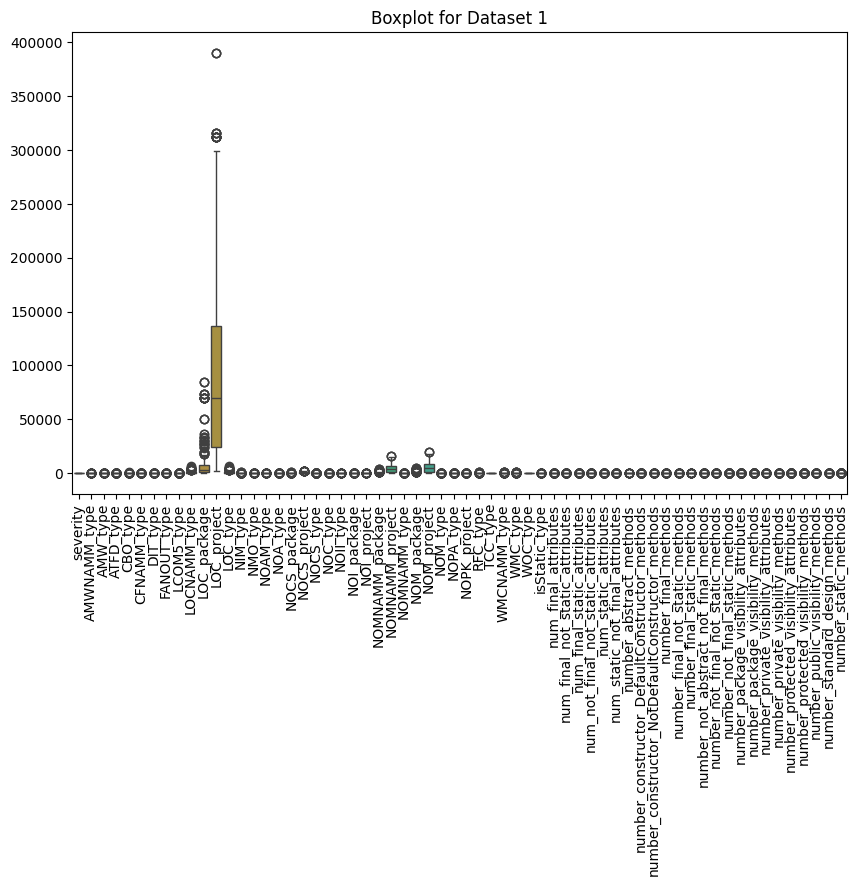


Dataset 2 - Statistical Measures:
Mean: 
severity                                   1.664286
NOP_method                                 2.295238
CC_method                                  0.588095
ATFD_method                                5.864286
FDP_method                                 1.697619
                                            ...    
number_protected_visibility_attributes     2.252381
number_protected_visibility_methods        2.154762
number_public_visibility_methods          12.600000
number_standard_design_methods            17.619048
number_static_methods                      2.054762
Length: 83, dtype: float64
75th Percentile: 
severity                                   3.00
NOP_method                                 3.00
CC_method                                  1.00
ATFD_method                                9.00
FDP_method                                 3.00
                                          ...  
number_protected_visibility_attributes     0.00
numbe

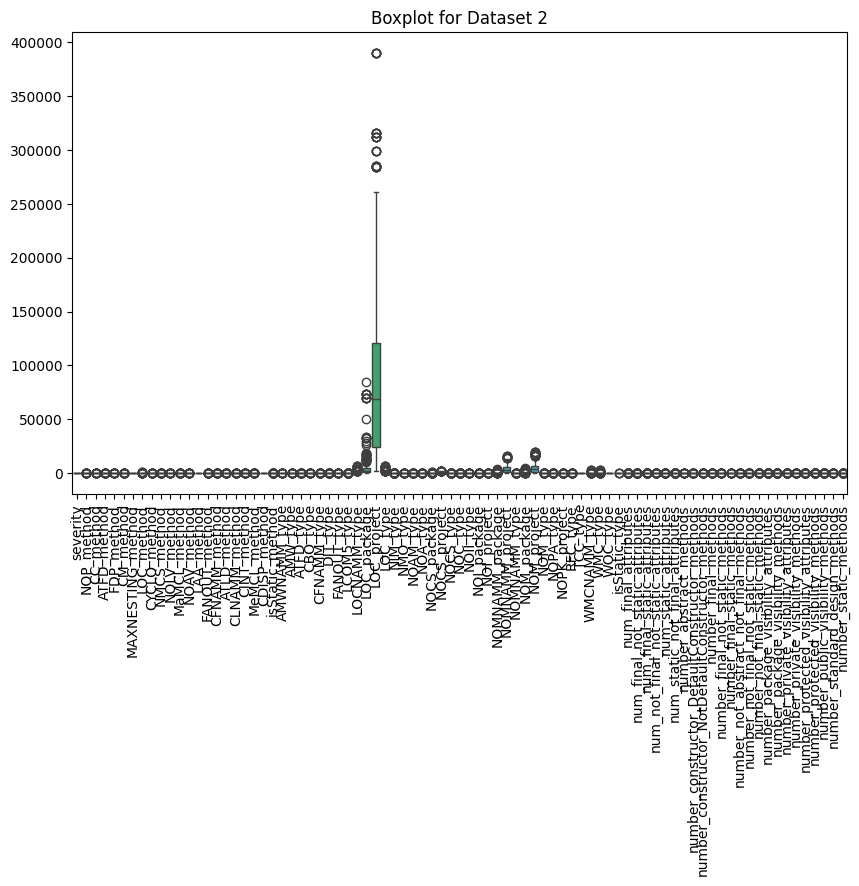


Dataset 3 - Statistical Measures:
Mean: 
severity                                   2.500000
AMWNAMM_type                               3.542682
AMW_type                                   3.353657
ATFD_type                                 15.935714
CBO_type                                  14.364286
                                            ...    
number_protected_visibility_attributes     3.009524
number_protected_visibility_methods        1.911905
number_public_visibility_methods          15.826190
number_standard_design_methods            15.557143
number_static_methods                      2.411905
Length: 62, dtype: float64
75th Percentile: 
severity                                   4.000000
AMWNAMM_type                               4.452346
AMW_type                                   3.923077
ATFD_type                                 14.000000
CBO_type                                  17.500000
                                            ...    
number_protected_visibility_a

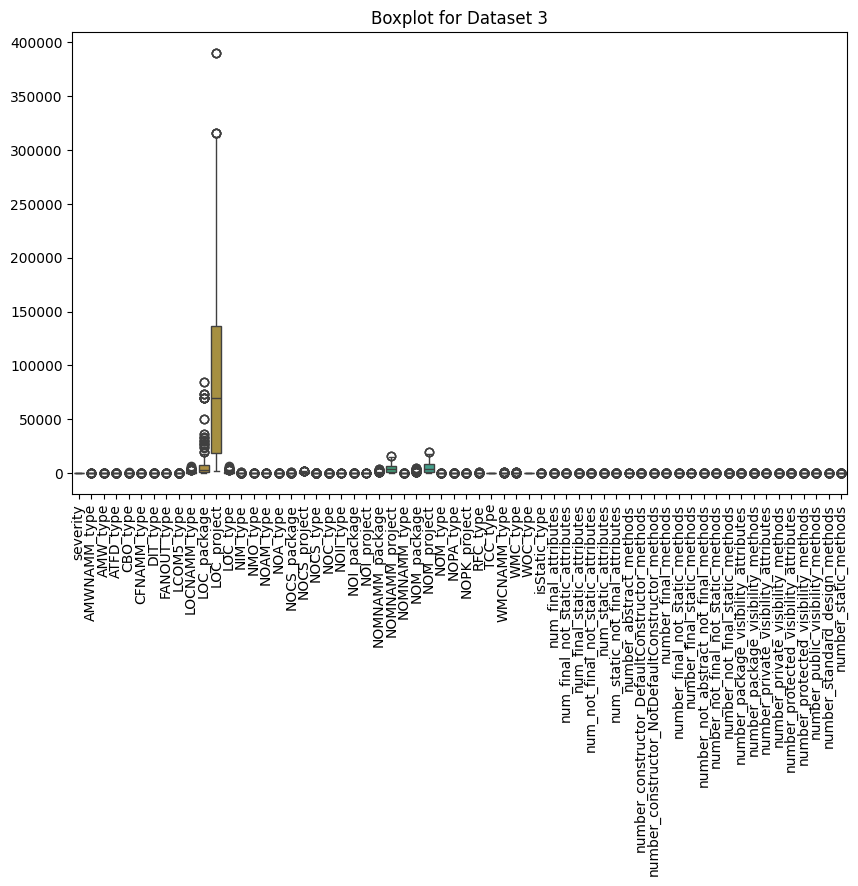


Dataset 4 - Statistical Measures:
Mean: 
severity                                   1.721429
NOP_method                                 2.188095
CC_method                                  0.564286
ATFD_method                                5.161905
FDP_method                                 1.514286
                                            ...    
number_protected_visibility_attributes     2.014286
number_protected_visibility_methods        2.190476
number_public_visibility_methods          12.400000
number_standard_design_methods            17.564286
number_static_methods                      2.069048
Length: 83, dtype: float64
75th Percentile: 
severity                                   3.0
NOP_method                                 3.0
CC_method                                  1.0
ATFD_method                                7.0
FDP_method                                 2.0
                                          ... 
number_protected_visibility_attributes     0.0
number_prote

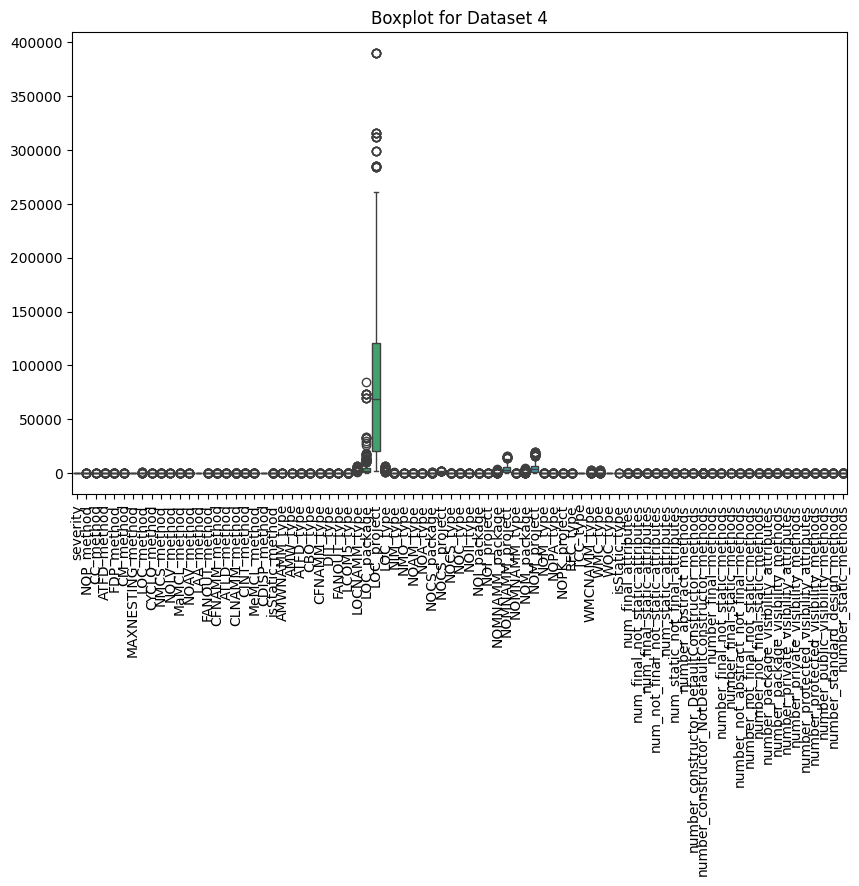

In [ ]:
for i, df in enumerate([df1, df2, df3, df4], 1):
    numeric_cols = df.select_dtypes(include=np.number)

    print(f"\nDataset {i} - Statistical Measures:")
    print(f"Mean: \n{numeric_cols.mean()}")
    print(f"75th Percentile: \n{numeric_cols.quantile(0.75)}")
    print(f"25th Percentile: \n{numeric_cols.quantile(0.25)}")
    print(f"Median: \n{numeric_cols.median()}")
    print(f"Third Quartile (Q3): \n{numeric_cols.quantile(0.75)}")

    # Boxplot for outliers in numeric columns
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=numeric_cols)
    plt.title(f'Boxplot for Dataset {i}')
    plt.xticks(rotation=90)
    plt.show()


Trimmed mean, median, and standard deviation (trimming 10% of data)

In [ ]:
for i, df in enumerate([df1, df2, df3, df4], 1):
    trimmed_mean = stats.trim_mean(df.select_dtypes(include=np.number), proportiontocut=0.1)
    trimmed_median = df.select_dtypes(include=np.number).apply(lambda x: np.median(stats.trimboth(x, proportiontocut=0.1)))
    trimmed_std = df.select_dtypes(include=np.number).apply(lambda x: np.std(stats.trimboth(x, proportiontocut=0.1)))

    print(f"\nDataset {i} - Trimmed Mean: {trimmed_mean}")
    print(f"Dataset {i} - Trimmed Median: {trimmed_median}")
    print(f"Dataset {i} - Trimmed Std Dev: {trimmed_std}")



Dataset 1 - Trimmed Mean: [2.50000000e+00 2.45705510e+00 2.21738140e+00 6.28571429e+00
 7.68154762e+00 1.10654762e+01 1.50595238e+00 5.01488095e+00
 7.96439069e-01 3.49854167e+02 4.45266071e+03 8.16807351e+04
 3.93889881e+02 7.13690476e+00 2.41071429e-01 4.16071429e+00
 9.10119048e+00 2.73720238e+01 6.04553571e+02 2.55952381e-01
 5.05952381e-02 2.88690476e-01 1.41666667e+00 5.09910714e+01
 1.89241071e+02 4.00345833e+03 9.61904762e+00 2.43687500e+02
 4.92173214e+03 1.48869048e+01 1.36607143e+00 3.46160714e+01
 4.08244048e+01 3.72063225e-01 4.63333333e+01 5.35476190e+01
 4.20279023e-01 0.00000000e+00 2.22619048e+00 2.67857143e-02
 1.77976190e+00 5.12797619e+00 2.08928571e+00 4.16666667e-02
 0.00000000e+00 6.84523810e-02 9.31547619e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.42202381e+01 1.30982143e+01
 2.05357143e-01 1.63690476e-01 1.96428571e-01 3.60416667e+00
 1.14583333e+00 4.52380952e-01 3.69047619e-01 9.47619048e+00
 8.48511905e+00 2.47023810e-01]
Dataset 1 - Trimmed Median

To get top N correlated features

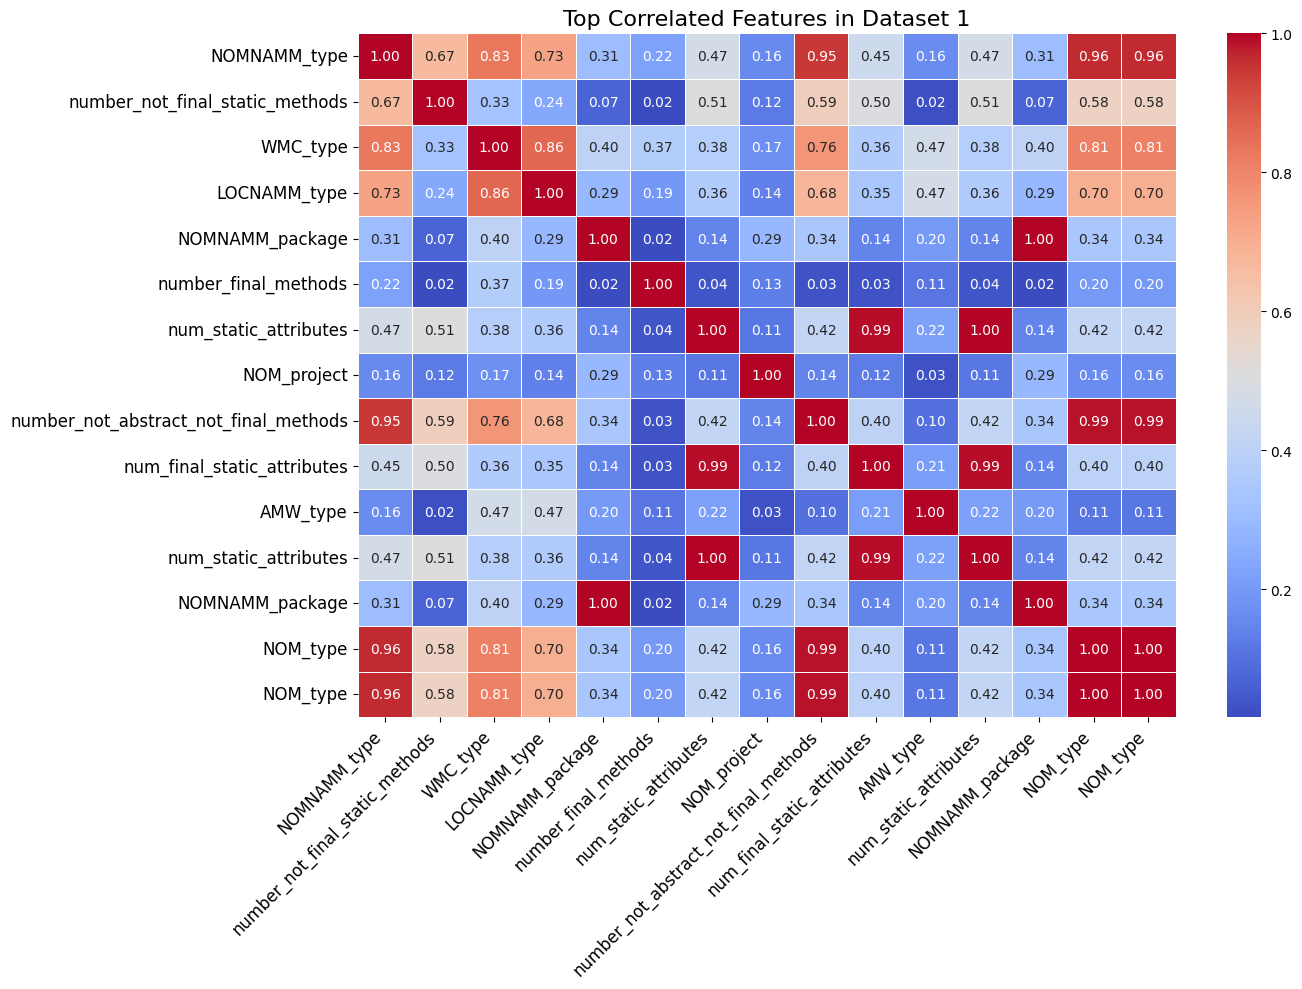

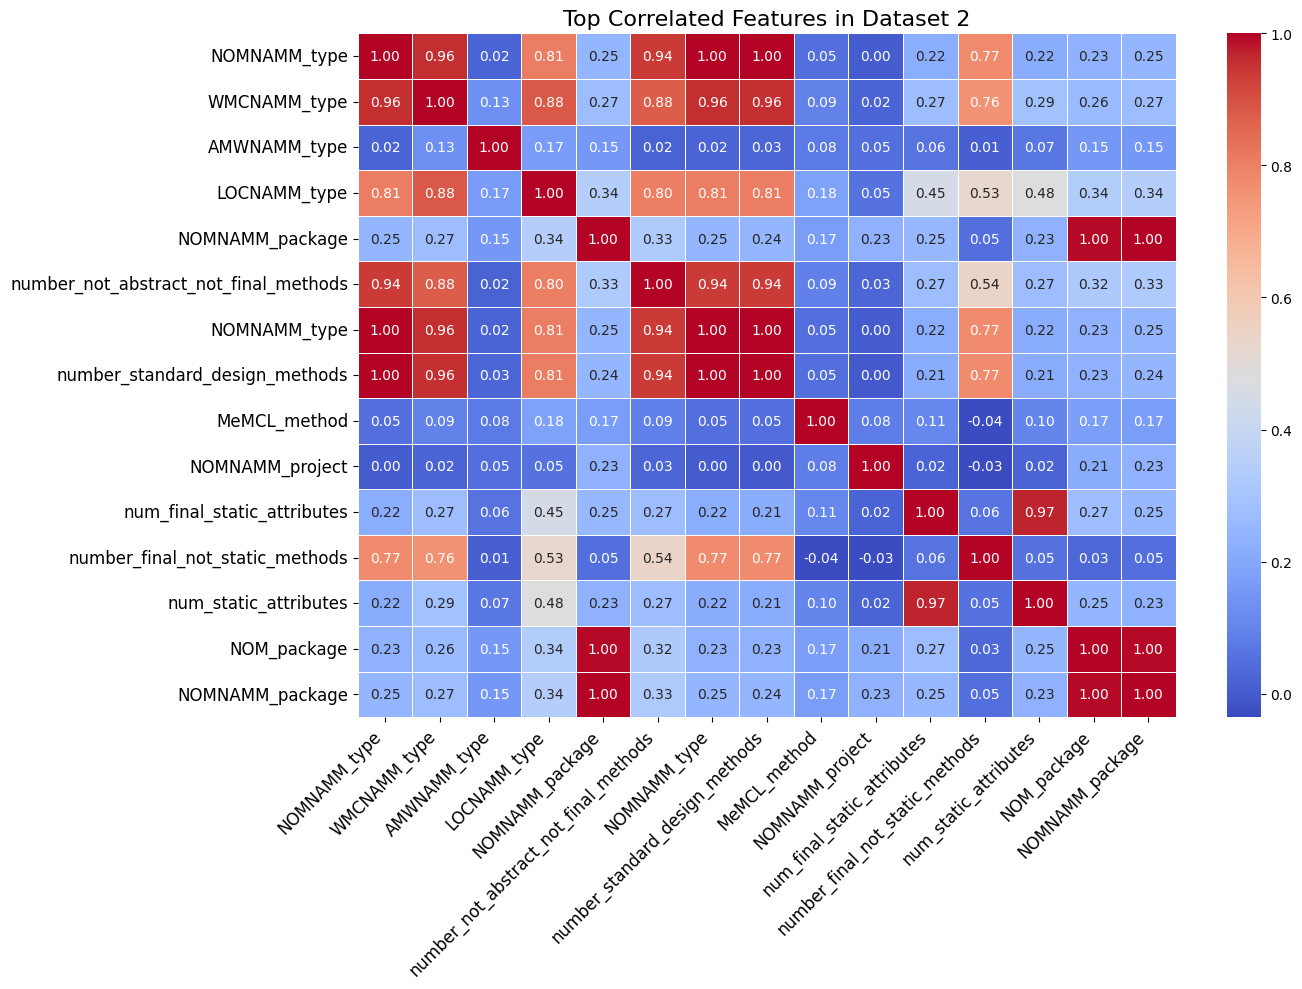

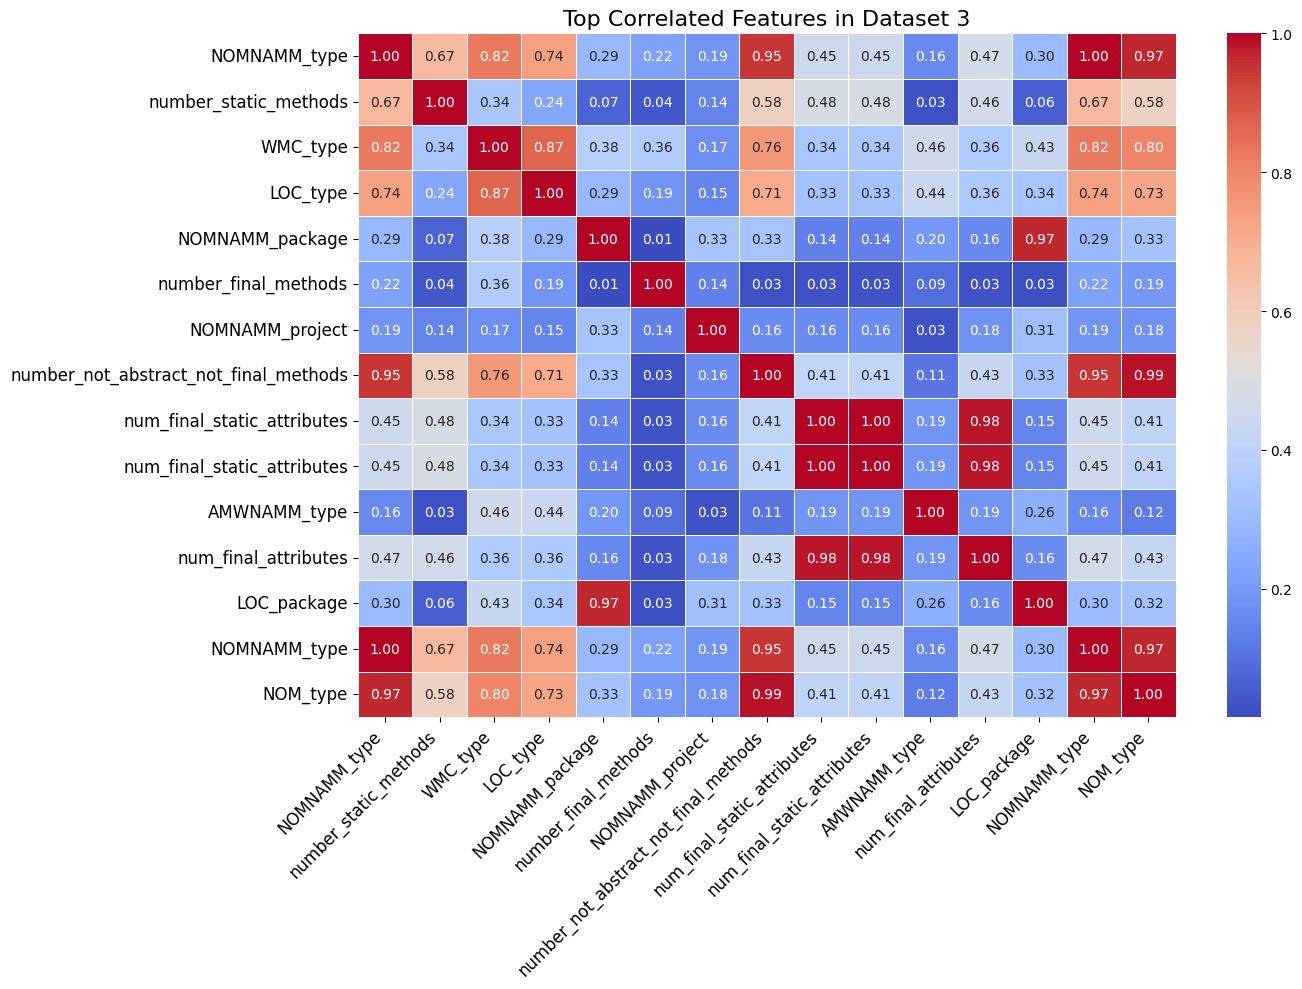

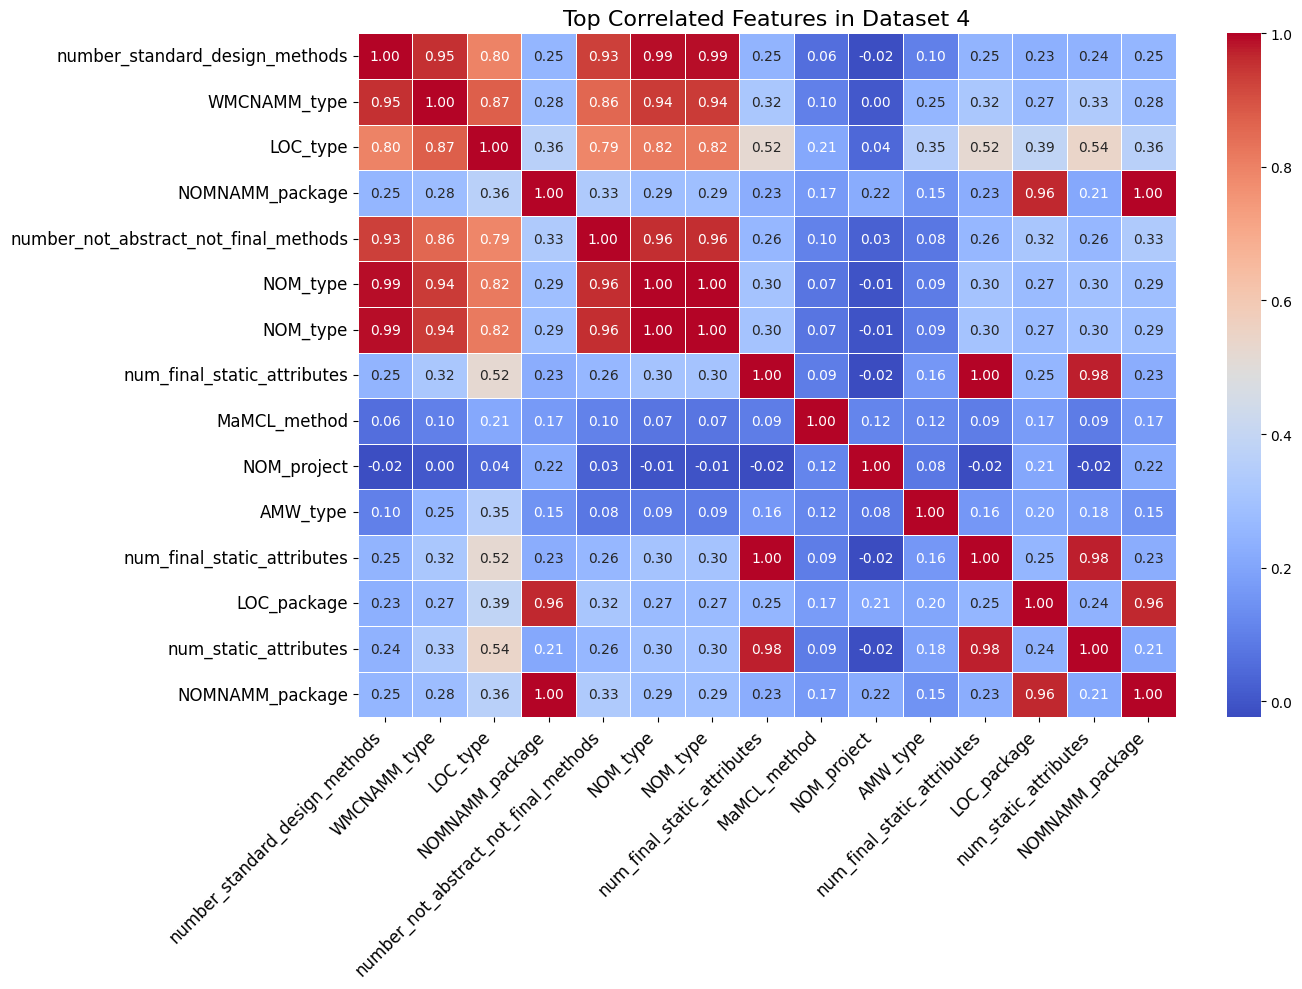

In [ ]:
 def top_n_corr_features(df, n=10, threshold=0.6):
    corr_matrix = df.corr().abs()
    high_corr_vars = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)

    # Filter out self-correlations and keep only those above the threshold
    filtered_corr = high_corr_vars[(high_corr_vars < 1) & (high_corr_vars >= threshold)]

    return filtered_corr.drop_duplicates().nlargest(n)

for i, df in enumerate([df1, df2, df3, df4], 1):
    numeric_cols = df.select_dtypes(include=np.number)

    if not numeric_cols.empty:
        top_corr = top_n_corr_features(numeric_cols, n=15, threshold=0.7)
        if not top_corr.empty:
            plt.figure(figsize=(14, 10))
            sns.heatmap(
                numeric_cols[top_corr.index.get_level_values(0)].corr(),
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                annot_kws={"size": 10},
                linewidths=0.5,
            )
            plt.title(f'Top Correlated Features in Dataset {i}', fontsize=16)
            plt.xticks(rotation=45, ha='right', fontsize=12)
            plt.yticks(fontsize=12)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Dataset {i} has no correlations above the threshold for visualization.")
    else:
        print(f"Dataset {i} has no numeric columns for correlation.")


To identify the top N correlated features in a dataset by calculating the absolute correlation values between numeric columns,

In [ ]:
# Function to get top N correlated features
def top_n_corr_features(df, n=10):
    corr_matrix = df.corr().abs().unstack()
    sorted_corr = corr_matrix.sort_values(kind="quicksort", ascending=False).drop_duplicates()
    return sorted_corr[sorted_corr < 1].nlargest(n)

# Number of top correlations to display
n = 10

for i, df in enumerate([df1, df2, df3, df4], 1):
    numeric_cols = df.select_dtypes(include=np.number)

    if not numeric_cols.empty:
        print(f"\nTop {n} Correlated Features for Dataset {i}")
        top_corr = top_n_corr_features(numeric_cols, n)
        print(top_corr)
    else:
        print(f"Dataset {i} has no numeric columns for correlation.")




Top 10 Correlated Features for Dataset 1
NOMNAMM_type                           number_standard_design_methods     0.999220
number_not_final_static_methods        number_static_methods              0.999217
WMC_type                               WMCNAMM_type                       0.996011
LOCNAMM_type                           LOC_type                           0.995183
NOMNAMM_package                        NOM_package                        0.993118
number_final_methods                   number_final_not_static_methods    0.992371
num_static_attributes                  num_final_static_attributes        0.990587
NOM_project                            NOMNAMM_project                    0.988518
number_not_abstract_not_final_methods  NOM_type                           0.985819
num_final_static_attributes            num_final_attributes               0.982900
dtype: float64

Top 10 Correlated Features for Dataset 2
NOMNAMM_type                           number_standard_design_methods  